# Bike Sharing MLR Assignment

## Step - 1 - Reading and understanding the data

In [1011]:
# Import necessary libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score


In [1012]:
# Reading the data

df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1013]:
# Checking info of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1014]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Findings - 
1. There are no missing values in the data
2. Dataset has 730 rows and 16 columns
3. Except 1 column, all other are either float or integer type
4. There are some categorical fields

## Step - 2 - Cleaning and Visualizing the data

### Dropping below columns from the dataset

1. **instant** - As it is an index column
2. **casual and registered** - Since **cnt** is our target variable and contains the sum of both
3. **dte** - Since we already have separate columns like 'year', 'month', 'wrokingday', hence we can remove this field.

In [1015]:
df.drop(columns=["instant","dteday","casual","registered"],inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Replacing non boolean categorical values with String

In [1016]:
# Replacing numbers with labels

season_labels = {
    1 : 'spring',
    2 : 'summer',
    3 : 'fall',
    4 : 'winter'
}

month_labels = {
    1 : 'January',
    2 : 'February',
    3 : 'March',
    4 : 'April',
    5 : 'May',
    6 : 'June',
    7 : 'July',
    8 : 'August',
    9 : 'September',
    10 : 'October',
    11 : 'November',
    12 : 'December'
}

weekday_labels = { # considering the first row of dteday to be 01-01-2018 and value against it is 6 which should be Monday
    0 : 'Tuesday',
    1 : 'Wednesday',
    2 : 'Thursday',
    3 : 'Friday',
    4 : 'Saturday',
    5 : 'Sunday',
    6 : 'Monday'
}

weathersit_labels = {
    1 : 'Clear_Or_Few_Clouds',
    2 : 'Mist_Or_Cloudy',
    3 : 'Light_Snow_Or_Rain',
    4 : 'Heavy_Rain_Or_Snow_Or_Fog'
}

df['season'] = df['season'].replace(season_labels)
df['mnth'] = df['mnth'].replace(month_labels)
df['weekday'] = df['weekday'].replace(weekday_labels)
df['weathersit'] = df['weathersit'].replace(weathersit_labels)

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Monday,0,Mist_Or_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,0,Mist_Or_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,Clear_Or_Few_Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,Clear_Or_Few_Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,Clear_Or_Few_Clouds,9.305237,11.46350,43.6957,12.522300,1600


### Plots

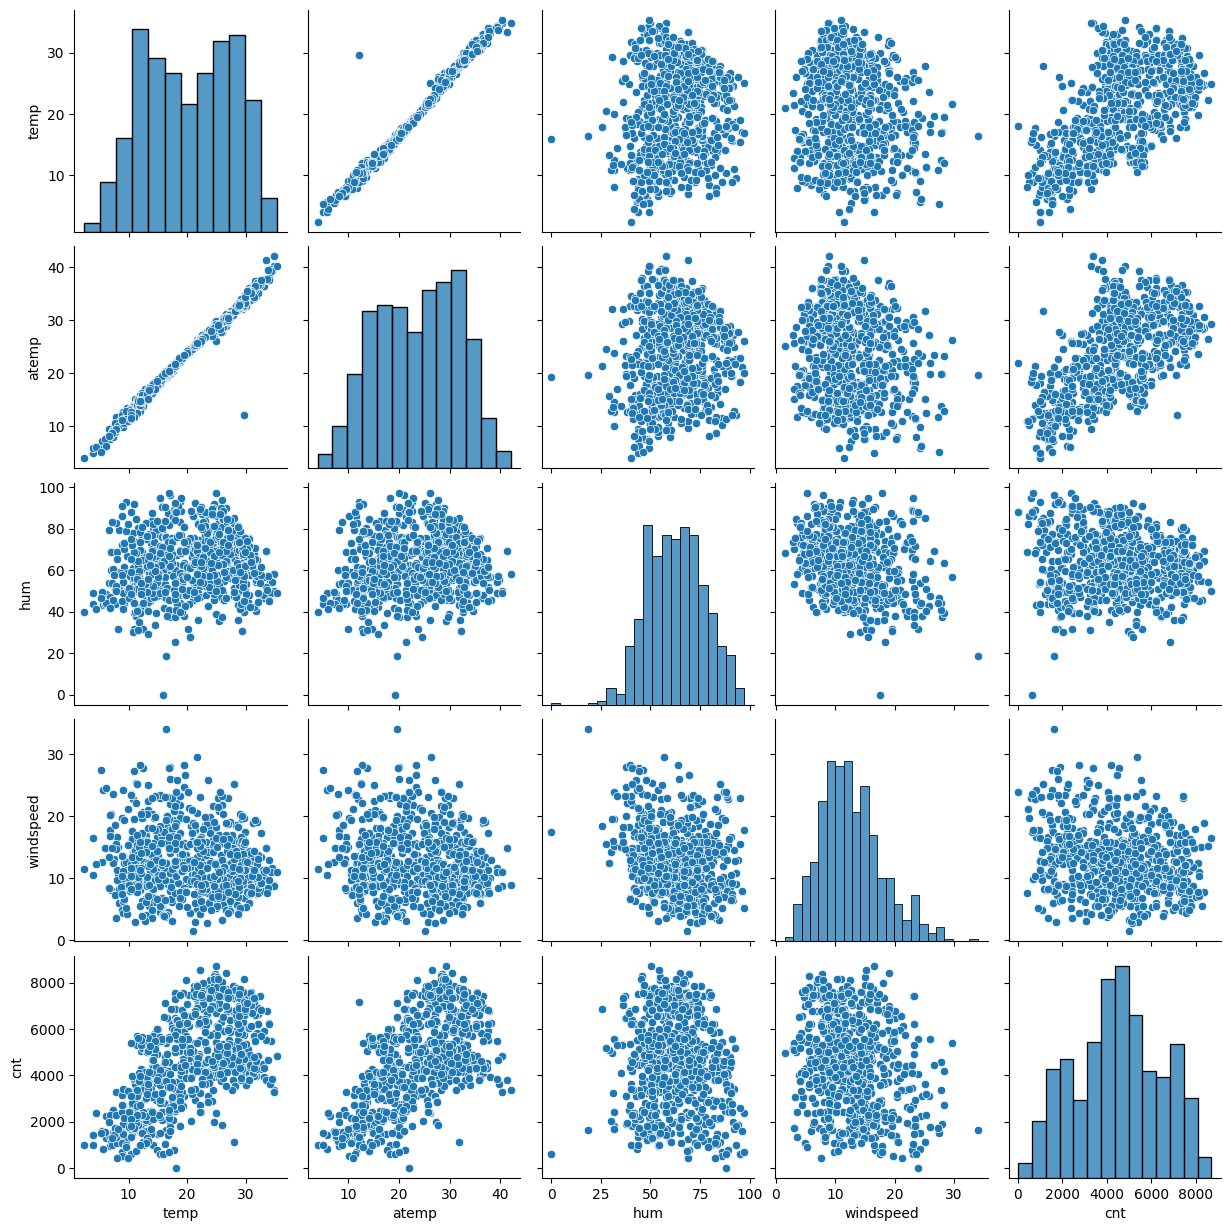

In [1017]:
# Scattered Plots

sns.pairplot(df, vars=['temp', 'atemp', 'hum', 'windspeed', 'cnt'])
plt.show()


### Observations

1. It seems temp and atemp have a relationship and are highly correlated - we need to check that
2. There is a linear relation between some variables with target variable

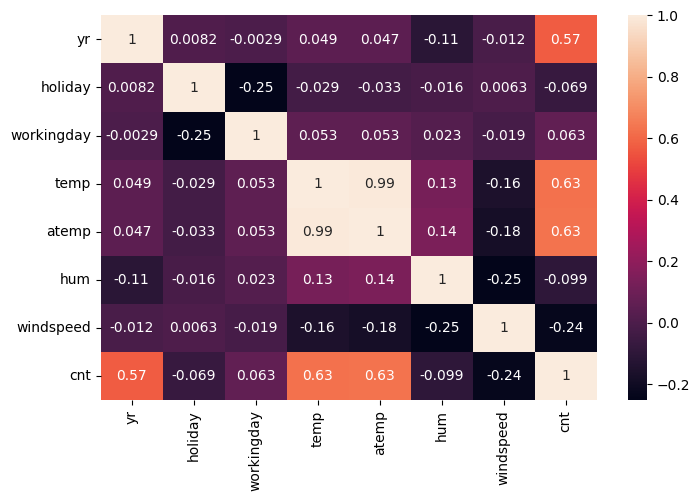

In [1018]:
# Checking Correlation

plt.figure(figsize = (8, 5))
sns.heatmap(df.corr(), annot = True)
plt.show()


 ### Correlation between temp and atemp is 0.99 which is almost 1 -> One can be dropped

 Since atemp is adjusted temperature and temp is the real one, lets keep the temp and drop atemp

In [1019]:
df.drop(['atemp'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,January,0,Monday,0,Mist_Or_Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,0,Mist_Or_Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,Clear_Or_Few_Clouds,8.050924,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,Clear_Or_Few_Clouds,8.200000,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,Clear_Or_Few_Clouds,9.305237,43.6957,12.522300,1600


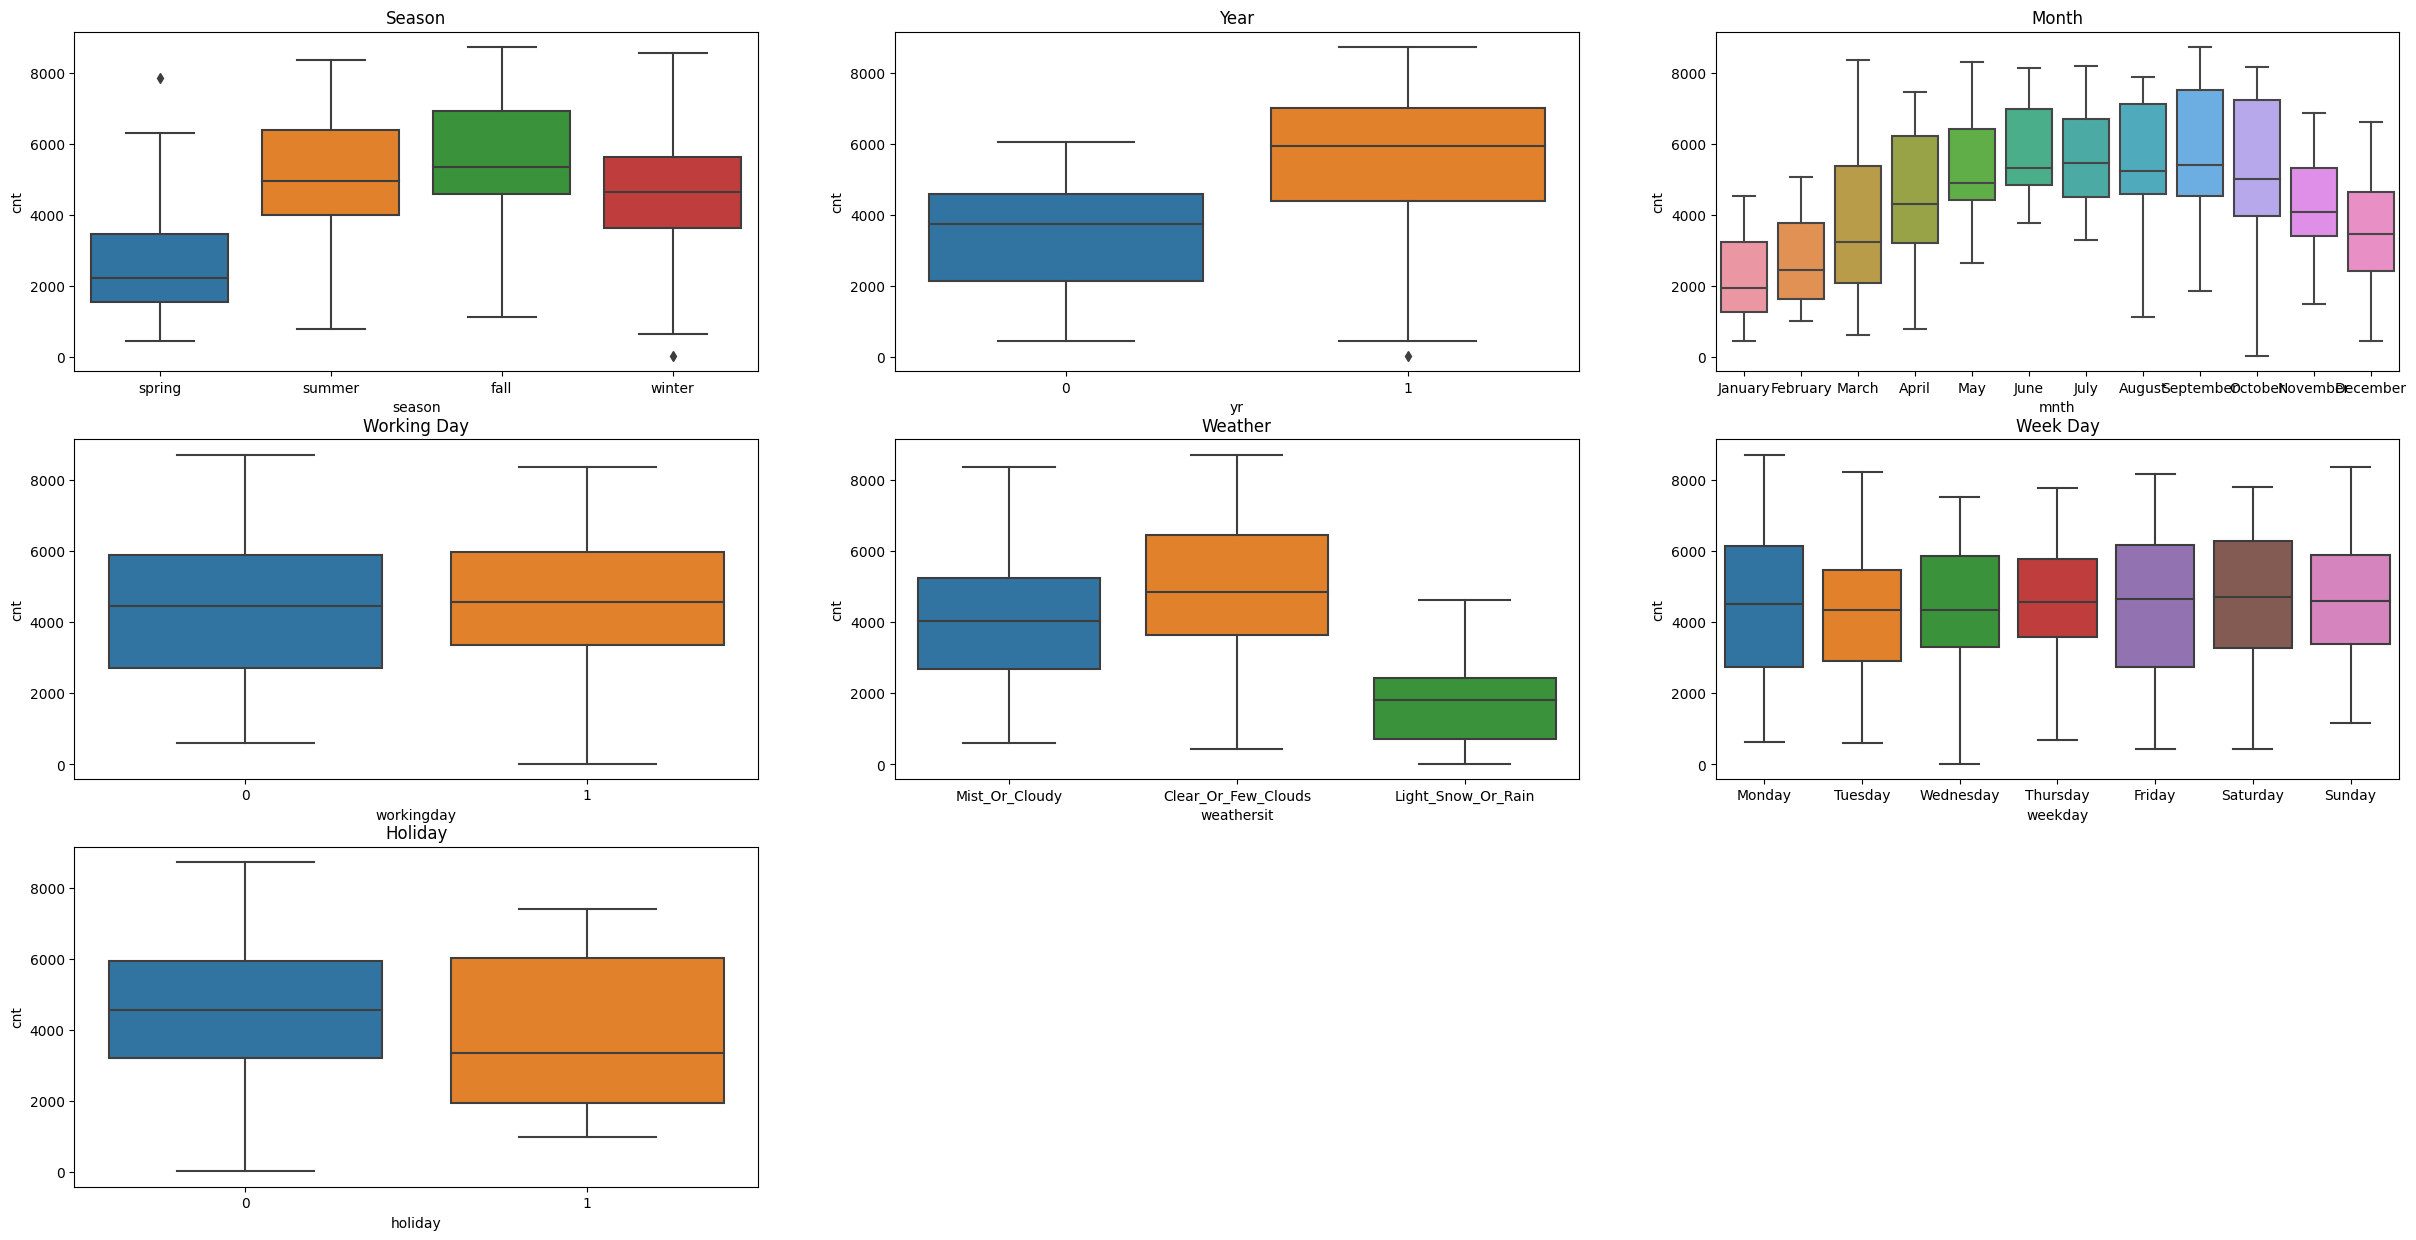

In [1020]:
# Visualizing Categorical Data

plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
plt.title("Season")
sns.boxplot(x = 'season', y = 'cnt', data = df)#yr','mnth','workingday','weathersit','weekday'
plt.subplot(3,3,2)
plt.title("Year")
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,3)
plt.title("Month")
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,4)
plt.title("Working Day")
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,5)
plt.title("Weather")
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,6)
plt.title("Week Day")
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,7)
plt.title("Holiday")
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.show()

### Observations - 

1. There is more demand in fall.
2. Demand is growing as demand is more in 2019 as compared to 2018
3. No significatnt difference in demand based on day of the week
4. Demand is little better on working day than on a holiday
5. Demand is high when the weather is clear
6. Demand is more during mid of the year than starting or ending of the year

## Step - 3 - Data Preparation

### Creation of Dummy Variables for non-binary categorical variables

In [1021]:
# Season
season_dummy = pd.get_dummies(df.season,drop_first=True)

# Month
month_dummy = pd.get_dummies(df.mnth,drop_first=True)

# Weekday
weekday_dummy = pd.get_dummies(df.weekday,drop_first=True)

#Weathersit
weathersit_dummy = pd.get_dummies(df.weathersit,drop_first=True)
weekday_dummy.head()


,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [1022]:
# Concatatinating all dummy columns to data
df = pd.concat([df,season_dummy,month_dummy,weekday_dummy,weathersit_dummy],axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow_Or_Rain,Mist_Or_Cloudy
0,spring,0,January,0,Monday,0,Mist_Or_Cloudy,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,January,0,Tuesday,0,Mist_Or_Cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,January,0,Wednesday,1,Clear_Or_Few_Clouds,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,January,0,Thursday,1,Clear_Or_Few_Clouds,8.200000,59.0435,10.739832,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,January,0,Friday,1,Clear_Or_Few_Clouds,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [1023]:
# Removing the original columns after concatinating
df.drop("season",axis=1,inplace=True)
df.drop("mnth",axis=1,inplace=True)
df.drop("weekday",axis=1,inplace=True)
df.drop("weathersit",axis=1,inplace=True)
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow_Or_Rain,Mist_Or_Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1024]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   yr                  730 non-null    int64  
 1   holiday             730 non-null    int64  
 2   workingday          730 non-null    int64  
 3   temp                730 non-null    float64
 4   hum                 730 non-null    float64
 5   windspeed           730 non-null    float64
 6   cnt                 730 non-null    int64  
 7   spring              730 non-null    uint8  
 8   summer              730 non-null    uint8  
 9   winter              730 non-null    uint8  
 10  August              730 non-null    uint8  
 11  December            730 non-null    uint8  
 12  February            730 non-null    uint8  
 13  January             730 non-null    uint8  
 14  July                730 non-null    uint8  
 15  June                730 non-null    uint8  
 16  March   

### Split the Data - Train and Test

In [1025]:
df_train, df_test = train_test_split(df,train_size=0.7,random_state=True)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


### Scaling Numerical Data

In [1026]:
scaler = MinMaxScaler()
scale_vars = ["temp","hum","windspeed","cnt"]
df_train[scale_vars] = scaler.fit_transform(df_train[scale_vars])
df_train[scale_vars].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.564793,0.526474,0.400317,0.525079
std,0.226815,0.194258,0.190021,0.218870
min,0.000000,0.000000,0.000000,0.000000
25%,0.372655,0.379602,0.264072,0.382737
50%,0.579661,0.524942,0.371641,0.527266
75%,0.757395,0.668793,0.512950,0.680022
max,1.000000,1.000000,1.000000,1.000000


## Step - 4 - Build the Model

In [1027]:
# Build X_train and y_train
y_train = df_train.pop("cnt")
X_train = df_train

In [1028]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,August,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow_Or_Rain,Mist_Or_Cloudy
135,0,0,1,0.656134,0.743040,0.249252,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
626,1,0,1,0.624490,0.393272,0.459915,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
554,1,0,1,0.824902,0.597447,0.378326,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
311,0,0,1,0.442008,0.650812,0.111281,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
312,0,0,1,0.431461,0.701856,0.094959,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [1029]:
y_train.head()

135    0.452830
626    0.870801
554    0.753221
311    0.481247
312    0.470202
Name: cnt, dtype: float64

### Using RFE approach to Build the Model
#### We will start with 15 Vars and will be using mixed approach to build the model

In [1030]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [1031]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 4),
 ('winter', False, 3),
 ('August', False, 12),
 ('December', False, 6),
 ('February', False, 8),
 ('January', False, 5),
 ('July', True, 1),
 ('June', False, 14),
 ('March', True, 1),
 ('May', False, 2),
 ('November', False, 7),
 ('October', True, 1),
 ('September', True, 1),
 ('Monday', True, 1),
 ('Saturday', False, 13),
 ('Sunday', False, 11),
 ('Thursday', False, 10),
 ('Tuesday', True, 1),
 ('Wednesday', False, 9),
 ('Light_Snow_Or_Rain', True, 1),
 ('Mist_Or_Cloudy', True, 1)]

In [1032]:
# Columns which were included after RFE

X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'July', 'March', 'October', 'September', 'Monday', 'Tuesday',
       'Light_Snow_Or_Rain', 'Mist_Or_Cloudy'],
      dtype='object')

In [1033]:
# Columns which were not included after RFE

X_train.columns[~rfe.support_]

Index(['summer', 'winter', 'August', 'December', 'February', 'January', 'June',
       'May', 'November', 'Saturday', 'Sunday', 'Thursday', 'Wednesday'],
      dtype='object')

In [1034]:
# Taking columns included in RFE

rfe_cols = X_train.columns[rfe.support_]
X_train_rfe = X_train[rfe_cols]
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,July,March,October,September,Monday,Tuesday,Light_Snow_Or_Rain,Mist_Or_Cloudy
135,0,0,1,0.656134,0.743040,0.249252,0,0,0,0,0,0,0,0,0
626,1,0,1,0.624490,0.393272,0.459915,0,0,0,0,1,0,0,0,0
554,1,0,1,0.824902,0.597447,0.378326,0,1,0,0,0,0,0,0,1
311,0,0,1,0.442008,0.650812,0.111281,0,0,0,0,0,0,0,0,0
312,0,0,1,0.431461,0.701856,0.094959,0,0,0,0,0,0,0,0,0


### Enhancing Model using statsmodel

### Model 1

In [1035]:
# Adding Constant
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()

print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.4
Date:                Thu, 17 Nov 2022   Prob (F-statistic):          4.91e-181
Time:                        23:49:01   Log-Likelihood:                 505.67
No. Observations:                 510   AIC:                            -981.3
Df Residuals:                     495   BIC:                            -917.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2664      0

### Observations :

1. R2 value is 0.831 which is good
2. F-statistic value is also good
3. p-value of variable like **holiday** is high (Lets check VIF)

In [1036]:
# Calculating VIF

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,25.29
12,Tuesday,6.58
11,Monday,5.23
3,temp,2.14
4,hum,2.14
1,holiday,2.09
6,spring,1.76
14,Mist_Or_Cloudy,1.66
13,Light_Snow_Or_Rain,1.45
7,July,1.38


#### Observations: 
1. VIF of 'workingday' is high and p-value is low
2. p-value of 'holiday' is high but VIF is low

Lets delete 'workingday' and then build the model again

In [1037]:
X_train_rfe = X_train_rfe.drop(['workingday'], axis = 1)

### Model 2

In [1038]:
X_train_sm = sm.add_constant(X_train_rfe)
lr2 = sm.OLS(y_train,X_train_sm)
lr2_model = lr2.fit()

print(lr2_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.4
Date:                Thu, 17 Nov 2022   Prob (F-statistic):          4.91e-181
Time:                        23:49:01   Log-Likelihood:                 505.67
No. Observations:                 510   AIC:                            -981.3
Df Residuals:                     495   BIC:                            -917.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3519      0

#### Calculating VIF

In [1039]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,11.71
2,temp,10.95
4,windspeed,4.73
13,Mist_Or_Cloudy,2.35
0,yr,1.96
5,spring,1.83
6,July,1.50
12,Light_Snow_Or_Rain,1.42
9,September,1.24
11,Tuesday,1.24


#### Observations

1. p-value are low for all now, which is good.
2. VIF is high for many vars, lets remove them one by one

In [1040]:
# Drop 'hum' column

X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

### Model 3

In [1041]:
X_train_sm = sm.add_constant(X_train_rfe)
lr3 = sm.OLS(y_train,X_train_sm)
lr3_model = lr3.fit()

print(lr3_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     179.8
Date:                Thu, 17 Nov 2022   Prob (F-statistic):          3.71e-178
Time:                        23:49:01   Log-Likelihood:                 496.10
No. Observations:                 510   AIC:                            -964.2
Df Residuals:                     496   BIC:                            -904.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2892      0

In [1042]:
# calculating VIF

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.36
3,windspeed,4.72
0,yr,1.96
4,spring,1.62
12,Mist_Or_Cloudy,1.46
5,July,1.43
8,September,1.23
10,Tuesday,1.21
6,March,1.17
9,Monday,1.17


#### Observations:

1. p-value of 'Monday' is high (>0.05) - lets remove it

In [1043]:
# Dropping 'Monday' column as it has high p-value

X_train_rfe=X_train_rfe.drop(['Monday'],axis=1)

### Model 4

In [1044]:
X_train_sm = sm.add_constant(X_train_rfe)
lr4 = sm.OLS(y_train,X_train_sm)
lr4_model = lr4.fit()

print(lr4_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     192.0
Date:                Thu, 17 Nov 2022   Prob (F-statistic):          7.39e-178
Time:                        23:49:01   Log-Likelihood:                 492.65
No. Observations:                 510   AIC:                            -959.3
Df Residuals:                     497   BIC:                            -904.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2970      0

In [1045]:
# Calculating VIF

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.31
3,windspeed,4.68
0,yr,1.96
4,spring,1.62
11,Mist_Or_Cloudy,1.46
5,July,1.43
8,September,1.23
9,Tuesday,1.18
6,March,1.17
7,October,1.14


#### Observations:

1. July has high p-value -> hence removing it

In [1046]:
X_train_rfe=X_train_rfe.drop(['July'],axis=1)

### Model 5

In [1047]:
X_train_sm = sm.add_constant(X_train_rfe)
lr5 = sm.OLS(y_train,X_train_sm)
lr5_model = lr5.fit()

print(lr5_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     206.1
Date:                Thu, 17 Nov 2022   Prob (F-statistic):          2.02e-177
Time:                        23:49:01   Log-Likelihood:                 488.85
No. Observations:                 510   AIC:                            -953.7
Df Residuals:                     498   BIC:                            -902.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3087      0

In [1048]:
# Calculating VIF

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.50
2,temp,4.14
0,yr,1.96
4,spring,1.62
10,Mist_Or_Cloudy,1.45
8,Tuesday,1.18
7,September,1.17
5,March,1.16
6,October,1.11
9,Light_Snow_Or_Rain,1.08


#### Observations:

##### Since p-values of all the parameters are low and also VIF is within range, we can go with this model

## Step - 5 - Model Validation

In [1049]:
# Predicting training values

y_train_pred = lr5_model.predict(X_train_sm)


In [1050]:
# Calculating residuals
res = y_train - y_train_pred

Text(0.5, 0.98, 'Error Terms')

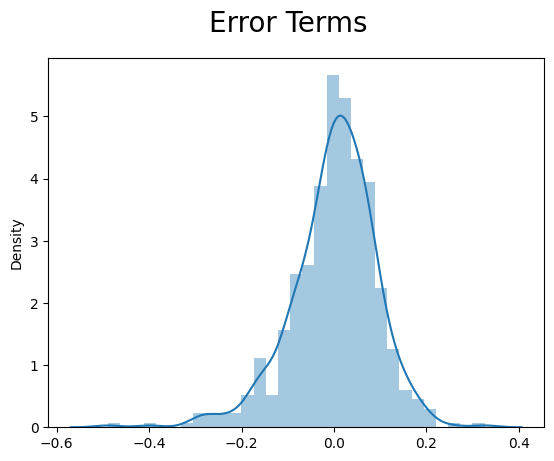

In [1051]:
# Plotting  Error Terms
fig = plt.figure()
sns.distplot((res))
fig.suptitle('Error Terms', fontsize = 20) 

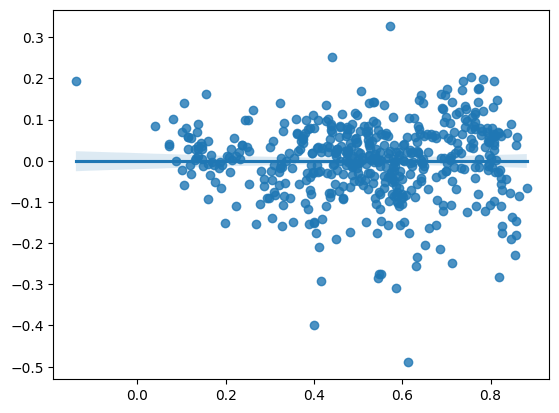

In [1052]:
# regplot
sns.regplot(x = y_train_pred, y = res)
plt.show()

#### R2 Value on training data

In [1054]:
r2 = r2_score(y_train, y_train_pred)
r2

0.8199290498006254

#### Observations
##### Error terms are normally distributed which means that linear regression assumption  is true

## Step - 6 - Prediction

#### Rescale test variables

In [1055]:
# Rescaling test variables

df_test[scale_vars] = scaler.transform(df_test[scale_vars])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow_Or_Rain,Mist_Or_Cloudy
248,0,0,1,0.608667,0.880915,0.767112,0.309250,0,0,0,...,0,1,0,0,0,1,0,0,1,0
298,0,0,1,0.537996,0.649072,0.301190,0.445467,0,0,1,...,1,0,0,0,0,0,0,0,0,1
159,0,0,1,0.948314,0.437354,0.304151,0.447883,0,1,0,...,0,0,0,1,0,0,0,0,0,1
660,1,0,1,0.613942,0.539443,0.172135,0.856420,0,0,1,...,1,0,0,0,0,1,0,0,0,0
511,1,0,0,0.798532,0.616589,0.459906,0.755752,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [1056]:
# Find X_test and y_test

y_test = df_test.pop('cnt')
X_test = df_test
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,August,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow_Or_Rain,Mist_Or_Cloudy
248,0,0,1,0.608667,0.880915,0.767112,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
298,0,0,1,0.537996,0.649072,0.301190,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
159,0,0,1,0.948314,0.437354,0.304151,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
660,1,0,1,0.613942,0.539443,0.172135,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
511,1,0,0,0.798532,0.616589,0.459906,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


#### Remove insignificant variables

In [1057]:
X_train_temp = X_train_sm.drop(['const'], axis = 1)
X_test_temp = X_test[X_train_temp.columns]

X_test_sm = sm.add_constant(X_test_temp)
X_test_sm.head()

,const,yr,holiday,temp,windspeed,spring,March,October,September,Tuesday,Light_Snow_Or_Rain,Mist_Or_Cloudy
248,1.0,0,0,0.608667,0.767112,0,0,0,1,0,1,0
298,1.0,0,0,0.537996,0.301190,0,0,1,0,0,0,1
159,1.0,0,0,0.948314,0.304151,0,0,0,0,0,0,1
660,1.0,1,0,0.613942,0.172135,0,0,1,0,0,0,0
511,1.0,1,0,0.798532,0.459906,0,0,0,0,1,0,0


In [1058]:
X_test_sm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 248 to 589
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   const               220 non-null    float64
 1   yr                  220 non-null    int64  
 2   holiday             220 non-null    int64  
 3   temp                220 non-null    float64
 4   windspeed           220 non-null    float64
 5   spring              220 non-null    uint8  
 6   March               220 non-null    uint8  
 7   October             220 non-null    uint8  
 8   September           220 non-null    uint8  
 9   Tuesday             220 non-null    uint8  
 10  Light_Snow_Or_Rain  220 non-null    uint8  
 11  Mist_Or_Cloudy      220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(7)
memory usage: 11.8 KB


#### Predicting Values

In [1059]:
y_test_pred = lr5_model.predict(X_test_sm)

In [1060]:
# Calculate res

res = y_test - y_test_pred

<AxesSubplot: ylabel='Density'>

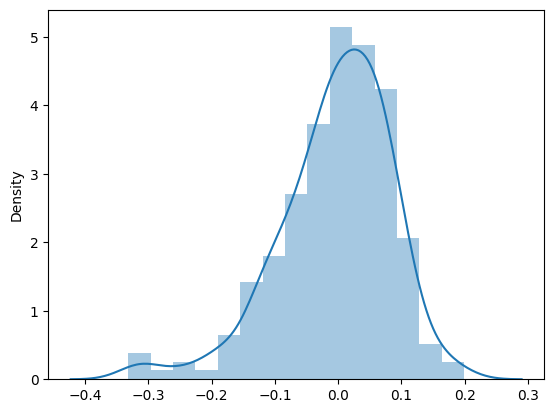

In [1061]:
# Plotting

sns.distplot(res)

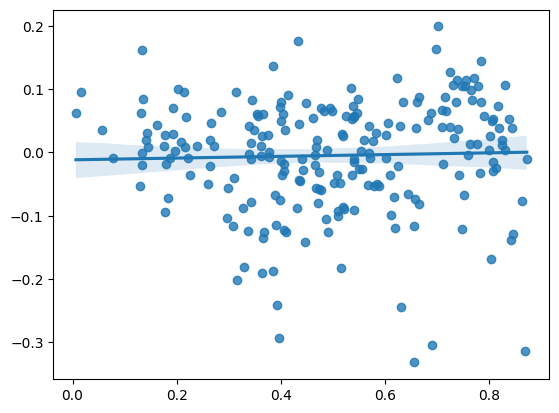

In [1062]:
# regplot
sns.regplot(x = y_test_pred, y = res)
plt.show()

In [1064]:
# Final Model Summary
lr5_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     206.1
Date:                Thu, 17 Nov 2022   Prob (F-statistic):          2.02e-177
Time:                        23:49:02   Log-Likelihood:                 488.85
No. Observations:                 510   AIC:                            -953.7
Df Residuals:                     498   BIC:                            -902.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3087      0.020     15.579      0.000       0.270       0.348
yr                     0.2406      0.008     28.819      0.000       0.224       0.257
holiday               -0.0808      0.024     -3.362      0.001      -0.128      -0.034
temp                   0.3546      0.024     14.977      0.000       0.308       0.401
windspeed             -0.1211      0.023     -5.323      0.000      -0.166      -0.076
spring                -0.1456      0.013    -11.005      0.000      -0.172      -0.120
March                  0.0594      0.017      3.515      0.000       0.026       0.093
October                0.0716      0.016      4.514      0.000       0.040       0.103
September              0.0766      0.015      4.994      0.000       0.046       0.107
Tuesday               -0.0439      0.011     -3.851      0.000      -0.066      -0.022
Light_Snow_Or_Rain    -0.2949      0.025    -12.013      0.000      -0.343      -0.247
Mist_Or_Cloudy        -0.0688      0.009     -7.621      0.000      -0.087      -0.051
==============================================================================
Omnibus:                       79.916   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.260
Skew:                          -0.810   Prob(JB):                     1.78e-42
Kurtosis:                       5.534   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Calculate r2 Value

In [1065]:
r2 = r2_score(y_test, y_test_pred)
r2

0.8506542019545288

#### Adjusted r2

In [1066]:
# Calculate adjusted r-Square
adjusted_r2 = 1 - (1 - r2) * (X_test.shape[0] -1 ) / (X_test.shape[0] - X_test.shape[1] - 1)
adjusted_r2

0.8287605771101665

### Conclusion

### **r2 Value = 0.82 (Training Data) and 0.85 (Test Data)**
### **Adjusted r2 = 0.816 (Training Data) and 0.828 (Test Data)**

### Model Equation : 
**cnt = 0.3087 + 0.2406 * yr - 0.0808 * holiday + 0.3546 * temp - 0.1211 * windspeed - 0.1456 * spring + 0.0594 * March + 0.0716 * October + 0.0766 * September - 0.0439 * Tuesday - 0.2949 * Light_Snow_Or_Rain - 0.0688 * Mist_Or_Cloudy**

### Top Variables Contributing
1. temp - Positive Correlation
2. yr - Positive Correlation
3. Light_Snow_Or_Rain - Negative Correlation